In [12]:
from pathlib import Path
import librosa, librosa.display
import numpy as np, scipy, matplotlib.pyplot as plt, sklearn, librosa, mir_eval, IPython.display, urllib
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (13, 5)

# Basic Feature Extraction
Loading all the songs

In [2]:
tempos = []
for p in Path().glob('songset/*.mp3'):
    y, sr = librosa.load(p, offset=30.0, duration=10.0)
    onset_env = librosa.onset.onset_strength(y, sr=sr)
    tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
    tempos.append((y, sr, round(tempo[0])))
    print(round(tempo[0]))

103.0
123.0
112.0
117.0
123.0


# Tempo 
below displays the tempo of the 103bpm song. You will notice that the tempo is not exactly on the beat, this is because of the variance of tempo throughout a song

In [10]:
T = len(tempos[0][0])/float(tempos[0][1])
seconds_per_beat = 60.0/tempos[0][2]
beat_times = np.arange(0, T, seconds_per_beat)

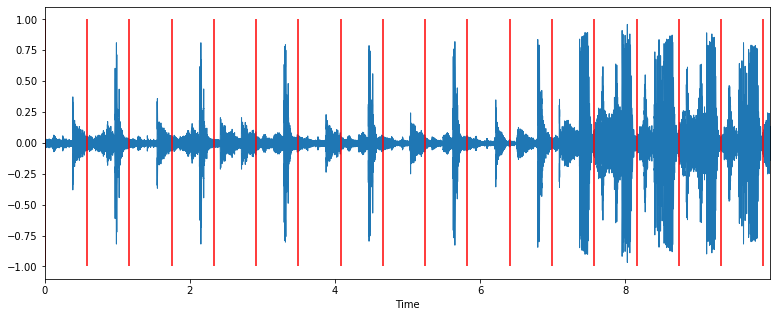

In [13]:
librosa.display.waveplot(tempos[0][0])
plt.vlines(beat_times, -1, 1, color='r')

# Zero Crossing Rate
The zero crossing rate indicates the number of times that a signal crosses the horizontal axis.

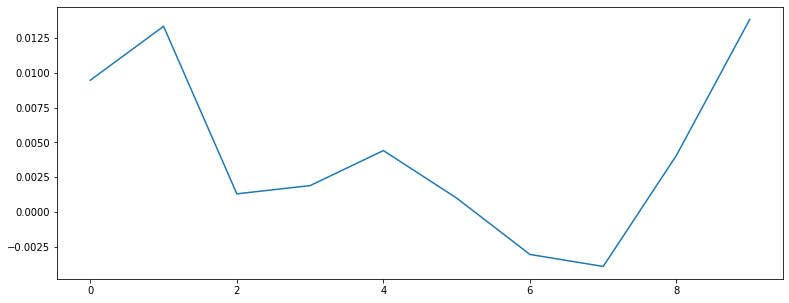

In [21]:
plt.plot(tempos[0][0][:10])

As you can see the zero crossing rate is 2

In [23]:
zero_crossings = librosa.zero_crossings(tempos[0][0][0:10], pad=False)
print(sum(zero_crossings))

2


# Mel Frequency Cepstral Coefficients (MFCCs)
The spectrogram shows the intensity of frequencies over time

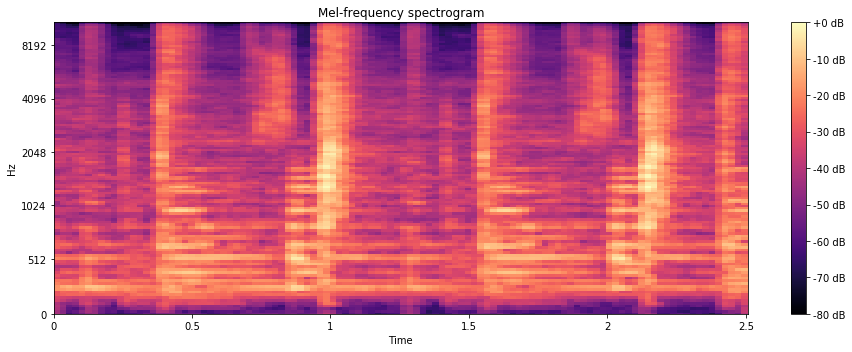

In [31]:
stop = round(len(tempos[0][0])/4)
mel = librosa.feature.melspectrogram(y=tempos[0][0][:stop], sr=tempos[0][1])
y_dB = librosa.power_to_db(mel, ref=np.max)
librosa.display.specshow(y_dB, x_axis="time", y_axis="mel", sr=tempos[0][1])
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

# Chroma 
A **chroma vector** is typically a 12-element feature vector indication how much energy of each pitch class {C, C#, D, D#, E, ..., B}, is present in the signal.

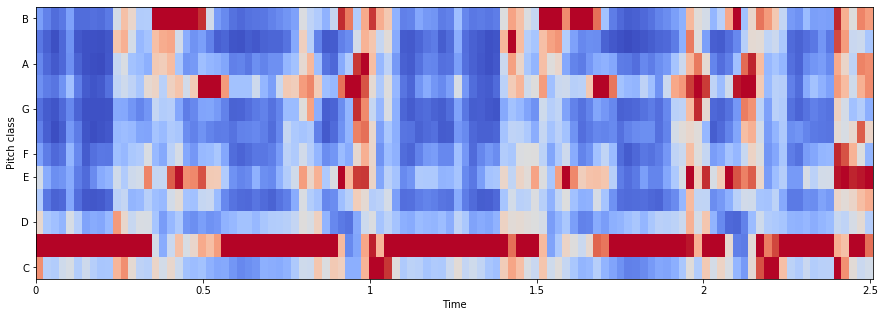

In [30]:
stop = round(len(tempos[0][0])/4)
chromagram = librosa.feature.chroma_stft(tempos[0][0][:stop], sr=tempos[0][1], hop_length=512)
plt.figure(figsize=(15,5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')